## Simple neural network
based on <a href="https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6">article</a> published by James Loy


In [1]:
# required imports
import numpy as np

<img src="neural_net.png">

In [2]:
# definition of neural network with input layer, one hidden layer and an output layer

# neuron activation function is sigmoid function defined as:

def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

class NeuralNetwork:
    
    def __init__(self, x, y):
        self.input = x
        # weights from input layer to hidden layer with 4 neurons
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        # weights from hidden layer to output layer with 1 neuron
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
        
    # feed forward to obtain network output
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        
    # backpropagation to update the weights
    def backprop(self):
        # application of chain rule to find derivative of loss function
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output)*sigmoid(self.output, derivative=True)))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y - self.output)*sigmoid(self.output, derivative=True), 
                                                 self.weights2.T)*sigmoid(self.layer1, derivative=True))
        
        # updating the weights with slope of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [3]:
# example of weights from input with 3 neurons to hidden layer with 4 neurons
# first row contains the weights from first input neuron to all the neurons in the hidden layer and so on
np.random.rand(3,4)

array([[0.15432604, 0.85701849, 0.22555341, 0.25646579],
       [0.22156994, 0.14780257, 0.58494771, 0.00107817],
       [0.60416416, 0.0869711 , 0.10357781, 0.09647111]])

In [4]:
# example of weigths from hiddne layer with 4 neurons to one output neuron
np.random.rand(4,1)

array([[0.23801778],
       [0.73823163],
       [0.66656299],
       [0.28136277]])

In [5]:
# definition of inputs
X = np.array([[0, 0, 1],
            [0, 1, 1],
            [1, 0, 1],
            [1, 1, 1]])
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [6]:
# definition of outputs
y = np.array([[0], [1], [1], [0]])
y

array([[0],
       [1],
       [1],
       [0]])

In [7]:
# creation of the neural network
net1= NeuralNetwork(X, y)

In [8]:
net1.feedforward()

In [9]:
net1.output

array([[0.74842107],
       [0.7689527 ],
       [0.78391411],
       [0.79578144]])

In [10]:
net1.backprop()

In [11]:
net1.output

array([[0.74842107],
       [0.7689527 ],
       [0.78391411],
       [0.79578144]])

In [12]:
net1.feedforward()
net1.output

array([[0.59431021],
       [0.59749308],
       [0.60629482],
       [0.6081511 ]])

In [13]:
np.sum((net1.output - y)**2)

1.0400679768317742

In [14]:
# training the network with 1500 iterations of feed forward and backpropagation
# loss function L is calculated as sum of squared errors

L = []
for i in range(1500):
    net1.feedforward()
    L.append(np.sum((net1.output - y)**2))
    net1.backprop()
    

# network prediction after training
net1.output

array([[0.01332903],
       [0.9804665 ],
       [0.97434868],
       [0.02544534]])

In [15]:
# loss function plot
import matplotlib.pyplot as plt
%matplotlib inline

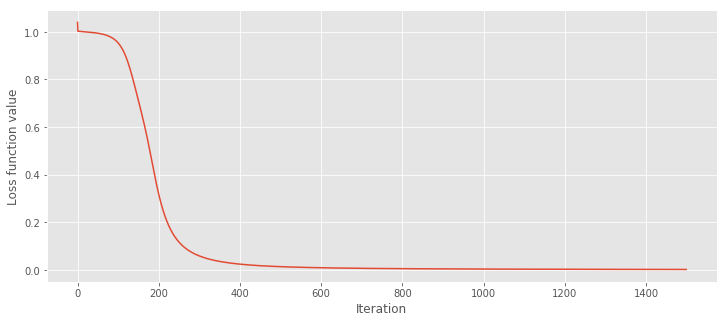

In [16]:
plt.style.use('ggplot')

plt.figure(figsize=(12,5))
plt.plot(L)
plt.xlabel('Iteration')
plt.ylabel('Loss function value');